* Student Name: Varun Aggarwal 
* ECE 595 Machine Learning II
* Project 3: GAN - Student Code

In [1]:
#Import necessary packages
import numpy as np
import keras
from keras.layers import Dense, Dropout, Input
from keras.models import Model,Sequential
from keras.datasets import mnist
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import adam
from keras.models import load_model
import matplotlib.pyplot as plt
import sys 

Using TensorFlow backend.


# Part 1: Implementing the GAN

In [14]:
#Load MNIST data and normalize to [-1, 1]
# Fill this in
(data_train, _), _ = mnist.load_data()
data_train = (data_train*2.0/255.0)-1.0
data_train = data_train.reshape(60000, -1)

# The D-dimensional noise vector length
latent_dim = 100

# Optimizer for discriminator, which will have a higher learning rate than adversarial model
def adam_optimizer(lr,beta1=0.9):
    # FILL THIS IN
    return adam(lr,beta1)

# Genrerator model
def create_generator():
    # FILL THIS IN
    model = Sequential()
    model.add(Dense(300, input_dim=latent_dim))
    model.add(LeakyReLU(0.1))
    model.add(Dense(600))
    model.add(LeakyReLU(0.1))
    model.add(Dense(1200))
    model.add(LeakyReLU(0.1))
    model.add(Dense(784, activation='tanh'))
#     model.compile(loss='binary_crossentropy', optimizer=adam_optimizer(1e-4), metrics=['accuracy'])
    return model

# Discriminator model
def create_discriminator(drop, alpha):
    # FILL THIS IN
    model = Sequential()
    model.add(Dense(1200, input_dim=784))
    model.add(LeakyReLU(0.1))
    if drop:
        model.add(Dropout(alpha))
    model.add(Dense(600))
    model.add(LeakyReLU(0.1))
    if drop:
        model.add(Dropout(alpha))
    model.add(Dense(300))
    model.add(LeakyReLU(0.1))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=adam_optimizer(2e-4, 0.5), metrics=['accuracy'])
    return model
    
# Create adversarial model
def create_gan(discriminator, generator):
    # FILL THIS IN
    discriminator.trainable = False
    gan_input = Input(shape=(latent_dim,))
    x = generator(gan_input)
    gan_output = discriminator(x)
    gan = Model(inputs=gan_input, outputs=gan_output)
    gan.compile(loss='binary_crossentropy', optimizer=adam_optimizer(1e-4), metrics=['accuracy'])
    return gan

# Creating GAN
generator = create_generator()
discriminator = create_discriminator(True, 0.5)
gan = create_gan(discriminator, generator)

# Model and training parameters
#ASSIGN VALUES TO THE FOLLOWING VARIABLES
epochs = 100000
batch_size = 1024 
sample_interval = epochs/10

print(data_train.shape[0])

60000


Epoch 10000
10000: [Discriminaotr loss: 0.423854, acc: 0.449707]  [GAN loss: 2.247496, acc: 0.049805]


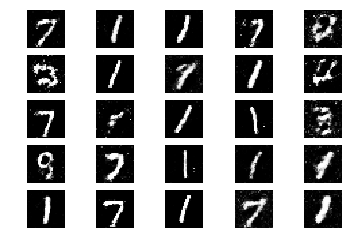

Epoch 20000
20000: [Discriminaotr loss: 0.556872, acc: 0.443848]  [GAN loss: 1.065539, acc: 0.302734]


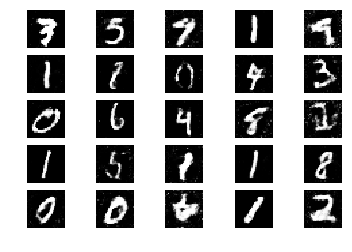

Epoch 30000
30000: [Discriminaotr loss: 0.582169, acc: 0.351074]  [GAN loss: 1.529784, acc: 0.089844]


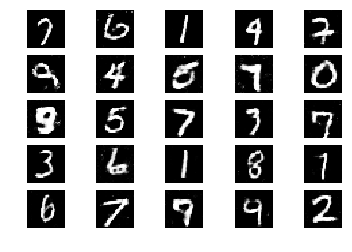

Epoch 40000
40000: [Discriminaotr loss: 0.580948, acc: 0.438965]  [GAN loss: 0.969483, acc: 0.311523]


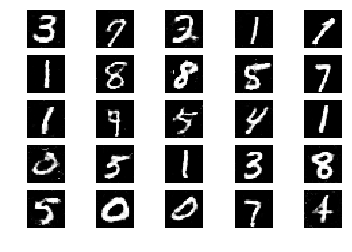

Epoch 50000
50000: [Discriminaotr loss: 0.581641, acc: 0.401367]  [GAN loss: 1.272291, acc: 0.156250]


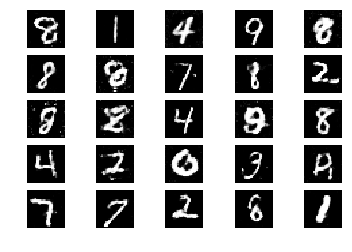

Epoch 60000
60000: [Discriminaotr loss: 0.565042, acc: 0.423340]  [GAN loss: 1.281008, acc: 0.171875]


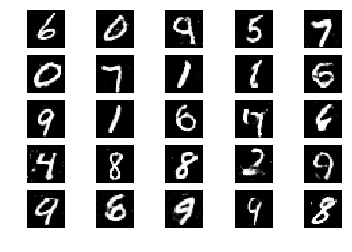

Epoch 70000
70000: [Discriminaotr loss: 0.580344, acc: 0.430664]  [GAN loss: 1.085924, acc: 0.242188]


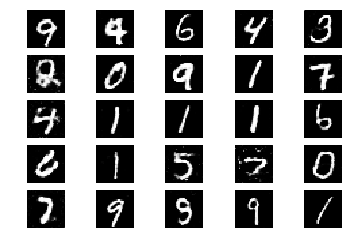

Epoch 80000
80000: [Discriminaotr loss: 0.567390, acc: 0.430176]  [GAN loss: 1.326462, acc: 0.150391]


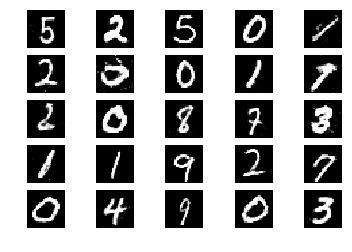

Epoch 90000
90000: [Discriminaotr loss: 0.559247, acc: 0.404785]  [GAN loss: 1.376665, acc: 0.137695]


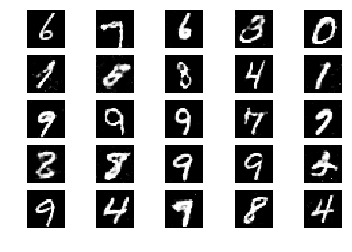

Epoch 100000
100000: [Discriminaotr loss: 0.560363, acc: 0.401855]  [GAN loss: 1.347885, acc: 0.143555]


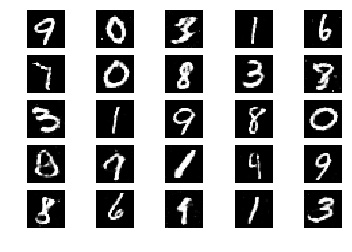

In [15]:
# Array to save training history
training_meta_data = np.zeros([epochs, 4])

# Training the GAN
for e in range(1, epochs+1):
    
    # keep track of epoch
    sys.stdout.write("\rEpoch %i" % e)
    sys.stdout.flush()
    
    # Generate random noise as input
    # FILL THIS IN
    ran_noise = np.random.normal(0, 1, [batch_size, latent_dim])

    # Generate fake MNIST images from generated noise
    # FILL THIS IN
    fake = generator.predict(ran_noise)

    # Get a random set of real MNIST images
    # FILL THIS IN
    real = data_train[np.random.randint(0, data_train.shape[0], batch_size)]

    # Concatenate real and fake images into a single array (or batch)
    # FILL THIS IN
    batch = np.concatenate([real, fake])

    # Assign training labels (assign high probability, but not 1, to real images)
    # FILL THIS IN
    label = np.zeros(2*batch_size) 
    label[:batch_size] = 0.9

    # Allow discriminator parameters to be updated
    # FILL THIS IN
    discriminator.trainable = True

    # Train discriminator on batch of real and fake images. Assign loss and accuracy to variable
    # FILL THIS IN
    d_loss = discriminator.train_on_batch(batch, label)

    # Train adversarial model and try to fool discriminator (with incorrect label) 
    # by generating a new batch of noise and assign them labels of real data
    # FILL THIS IN
    ran_noise = np.random.normal(0, 1, [batch_size, latent_dim])
    label = np.ones(batch_size)
    
    # Keep discriminator weights constant while training generator
    # FILL THIS IN
    discriminator.trainable = False

    # Train GAN (without updating discriminator weights) on new batch of fake images. Assign loss and accuracy to variable
    # FILL THIS IN
    gan_loss = gan.train_on_batch(ran_noise, label)

    # Save training status
    # Discriminator and model loss
    training_meta_data[e-1, 0] = d_loss[0]
    training_meta_data[e-1, 1] = gan_loss[0]

    # Discriminator and model accuracy
    training_meta_data[e-1, 2] = d_loss[1]
    training_meta_data[e-1, 3] = gan_loss[1]


    # If at sample interval, print training status and save samples
    if e % sample_interval == 0:
        # Print training status
        print("")
        log_mesg = "%d: [Discriminaotr loss: %f, acc: %f]" % (e, d_loss[0], d_loss[1])
        log_mesg = "%s  [GAN loss: %f, acc: %f]" % (log_mesg, gan_loss[0], gan_loss[1])
        print(log_mesg)
        
        # Plot images 
        r, c = 5, 5

        # Create images from the noise (predict the outcome of the noise)
        gen_imgs = generator.predict(ran_noise)

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow((gen_imgs[cnt].reshape(28, 28)), cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        plt.show()

Text(0.5,1,u'Training loss')

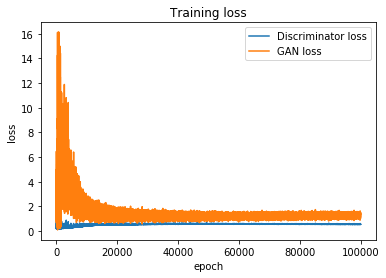

In [26]:
# Plot model loss vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT 
plt.plot(training_meta_data[:,0])
plt.plot(training_meta_data[:,1])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Discriminator loss','GAN loss'])
plt.title('Training loss')

Text(0.5,1,u'Training Accuracy')

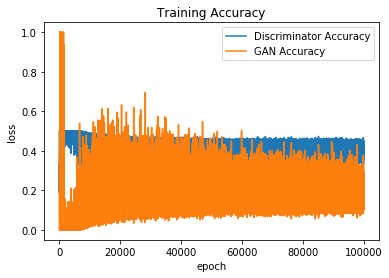

In [28]:
# Plot accuracy vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(training_meta_data[:,2])
plt.plot(training_meta_data[:,3])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Discriminator Accuracy','GAN Accuracy'])
plt.title('Training Accuracy')

[4]. Compare and comment on the results of GAN with dropout and without dropout.


[5][a]. Comment on importance of hyper-parameter tuning


[6]. Answer the following questions:



1.   Why does the accuracy of the discriminator remain around 50%? Is this a good trait of the GAN? 

  ANS: 


2.   How could this model be modified to produce cleaner (less noisy) images? 

  ANS: 

# Part 2: Generating samples using trained generator

In [29]:
# Generate ten images from Gaussian noise using the trained generator from Part 1
# FILL THIS IN
ran_noise = np.random.normal(0, 1, [10, latent_dim])
gen_images = generator.predict(ran_noise)

# Re-scale generated images to lie in [0, 1]
# FILL THIS IN
gen_images = 0.5 * gen_images + 0.5

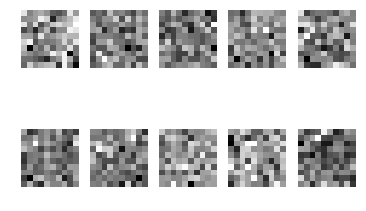

In [30]:
# Visualize generated noise
r, c = 2, 5
fig, axs = plt.subplots(r, c)
cnt = 0
for i in range(r):
    for j in range(c):
        axs[i,j].imshow((ran_noise[cnt].reshape(10, 10)), cmap='gray')
        axs[i,j].axis('off')
        cnt += 1
plt.show()

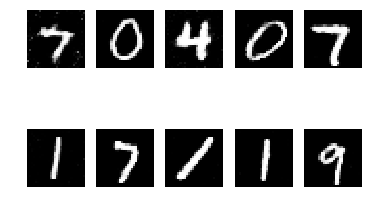

In [32]:
# Visualize generated samples
r, c = 2, 5
fig, axs = plt.subplots(r, c)
cnt = 0
for i in range(r):
    for j in range(c):
        axs[i,j].imshow((gen_images[cnt].reshape(28, 28)), cmap='gray')
        axs[i,j].axis('off')
        cnt += 1
plt.show()

# Part 3: Testing accuracy of generated images on ten samples

In [33]:
# Load mnist classifier and generated images
mnist_classifier = load_model('mnist_classifier.h5')

In [49]:
# ASSIGN CLASSES
labels = [7,0,4,0,7,1,7,1,1,9]

# Show classifications
# FILL THIS IN 
pred_mnist = mnist_classifier.predict(gen_images)
print("Predicted Labels")
print(np.argmax(pred_mnist, axis=1))
print("\nTrue Labels")
print(labels)

# Convert integer labels to one-hot labels 
labels = keras.utils.np_utils.to_categorical(labels, num_classes=10)

# Evaluate accuracy
# FILL THIS IN 
loss, acc = mnist_classifier.evaluate(gen_images, labels, verbose=0)
# print(acc*100)
print("\nLoss: {:e}\n\nAccuracy: {:0.2f}%".format(loss, acc*100))

Predicted Labels
[7 0 4 0 7 1 7 1 1 9]

True Labels
[7, 0, 4, 0, 7, 1, 7, 1, 1, 9]

Loss: 1.192093e-07

Accuracy: 100.00%
